# Linear Regression 线性回归

Name: [黄京凤]

Skeleton framework for you to fill in (Code you need to provide is marked by `###`):

In [6]:
import scipy.io as sio
import matplotlib.pyplot as plt  
import numpy as np 
from numpy import linalg
import pandas as pd

In [7]:
def LR_train( x , y , lamb=0.0001 ):
    """
    Function: Calculate the regression coefficient
    Input:    
              x:    Training data, size: [num_sample dimension], type: numpy.ndarray
              y:    Training label, size: [num_sample 1], type: numpy.ndarray
              lamb: The regularization coefficient
    Outpyt:   
              w:    Regression coefficient
    """
    # The variable m is the number of the training data. 
    # The variable d is the dimension of the training data.
    [m, d] = x.shape
    
    # Add a vector whose component all is 1 to the sample matrix
    # If x is a matrix, x.T means the transpose of x.
    x = np.column_stack( ((np.ones(m)).T , x) )
    
    # Your code
    # Here you should calculate the weight.
    # You may use two functions:
    # 1. linalg.pinv(). This function is used to solve the pseudo-inverse of the matrix.
    # You can know more about it from https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html.
    # 2. np.dot(). This function is dot product of two arrays.
    # You can know more about it from https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html.
    w = np.dot(np.dot(linalg.pinv(np.dot(x.T,x)),x.T),y)
    
    return w

In [8]:
def LR_test( x , y, w, problem_type='regression' ):
    """
    Function: Predict the testing data
    Input:    
              x: Testing data, size: [num_sample dimension], type: numpy.ndarray
              y: Testing label, size: [num_sample 1], type: numpy.ndarray
              w: Regression coefficient, size: [dimension+1 1], type: numpy.ndarray
              problem_type: The type of problem which you want to slove. Only regression and classification, type: string
    Output:   
              t: Prediction of testing data
    """
    # The variable m is the number of the testing data. 
    # The variable d is the dimension of the testing data.
    m, d = x.shape
    
    x = np.column_stack( ((np.ones(m)).T , x) )
    # Your code
    # Here, the variable t is the prediction of testing data, and you should calculate it.
    t = np.dot(x,w)
    
    # Three kinds of errors
    er = t - y
    MSE = (er**2).mean()                      # Mean Squared Error
    MAE = abs(er).mean()                      # Average Absolute Error
    SD = np.sqrt((( er-er.mean())**2).mean()) # Error Standard Deviation
    
    if problem_type=='classification':
        acc = np.equal(np.rint(t), y).mean() * 100
        text = "The Linear Regression's accuracy is %.2f%%." %(acc)
        print(text)
    
    obj = pd.Series([MSE,MAE,SD], index=['MSE','MAE','SD'])
    print(obj)
    
    return t

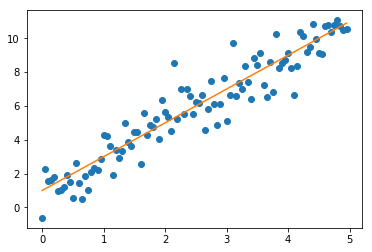

In [9]:
# Create data
# The slope k is 1, the bias b is 2. The weight is the transposition of [w, b]
w = np.array([[1.0], [2.0]])

# The x is (0, 0.05, 0.1,..., 4.95, 5)
x = np.arange(0,5,5/100)
x = np.column_stack( ((np.ones(100)) , x) )

true_y = np.dot(x, w)
# Add the noise to the data.
noise_y = true_y + np.random.randn(100,1)
true_y = np.round(true_y, 2)

plt.plot(x[:,1], noise_y, 'o')
plt.plot(x[:,1], np.dot(x, w))
plt.show()

MSE    0.004568
MAE    0.067493
SD     0.003536
dtype: float64


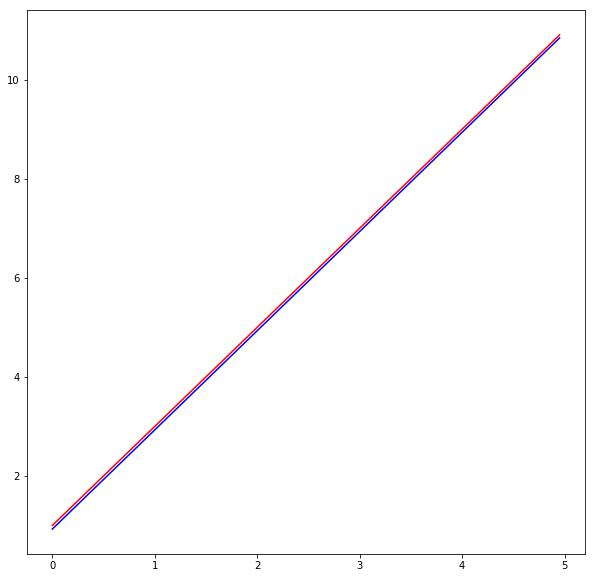

The blue one is the Linear Regression estimated parameters. The red one is the true parameters.


In [10]:
pred_w = LR_train(x, noise_y)
t = LR_test(x, true_y, pred_w)

plt.figure(figsize=(10,10)) 
plt.plot(x[:,1], t, 'b')
plt.plot(x[:,1], np.dot(x, w), 'r')
plt.show()
print('The blue one is the Linear Regression estimated parameters. The red one is the true parameters.')

In [11]:
# Import data
# data_path = ### "The path where you store the SpectralClassification data" ###
data_path = "data/SpectralClassification/No_removal_of_continuous_spectrum/"

data=sio.loadmat(data_path + "SpectralClassificationTrain.mat") 
train_x = data['train_x']
train_y = np.reshape(data['train_y'][:,0], [-1,1])

data=sio.loadmat(data_path + "SpectralClassificationTest.mat") 
test_x = data['test_x']
test_y = np.reshape(data['test_y'][:,0], [-1,1])

del data

In [12]:
w = LR_train(train_x, train_y)
t = LR_test(test_x , test_y , w, problem_type='classification')

The Linear Regression's accuracy is 69.00%.
MSE    0.463283
MAE    0.443928
SD     0.618403
dtype: float64
